In [3]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import logging
from dataset import DataloaderImg

plt.ion()  # interactive mode

# install pytorch correctly
# https://discuss.pytorch.org/t/torch-cuda-is-not-available/74845/11

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
logging.basicConfig(
    level=logging.INFO,
)
# install cuda driver ubuntu
# https://ubuntu.com/server/docs/nvidia-drivers-installation

cpu


In [4]:
# https://pytorch.org/docs/stable/cuda.html
# torch.cuda.is_initialized()

if torch.cuda.is_available():
    current_device = torch.cuda.current_device()
    print(f"Current cuda device: {torch.cuda.get_device_name(current_device)}")

In [8]:
# script for segmentation
# https://github.com/mateuszbuda/brain-segmentation-pytorch

In [5]:

# help in loading images
# https://discuss.pytorch.org/t/how-to-load-all-the-nii-from-the-directory-without-augmentation-using-pytorch-dataloader/60938/3
root_dir = "/media/MeMoSLAP_Subjects/derivatives/automated_electrode_extraction/train"  #!NOTE: delete "/train" for all subjects
root_dir = "~/segmentation"

# full_dataset = Dataloder_img('C:/Users/Ali ktk/.spyder-py3/dataloader/data/train/1', 'C:/Users/Ali ktk/.spyder-py3/dataloader/data/train/1/ADNI_136_S_0300_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080529142830882_S50401_I107759.nii' ,tfms.Compose([tfms.RandomRotation(180).tfms.ToTensor()]))
train_dataset = DataloaderImg(
    root_dir,
    subset="train",
    validation_cases=1,
)
validation_dataset = DataloaderImg(
    root_dir,
    subset="validation",
    validation_cases=1,
)

ValueError: Sample larger than population or is negative

volume Size: 18579456
mask Size: 18579456


test_img shape: torch.Size([1, 256, 256, 3])


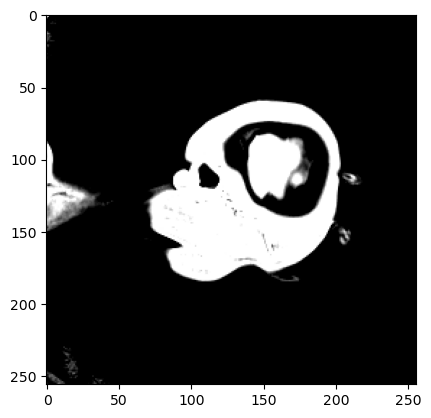

In [46]:
loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

test_img, test_mask = next(iter(loader))

print(f"test_img shape: {test_img.shape}")

plt.imshow(test_img[0])

In [ ]:
model = torch.hub.load(
    "...",
    "unet",
    in_channels=3,
    out_channels=1,
    init_features=32,
    pretrained=False,
)